# Linear Regression 

## import library

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

## load point data for training and testing

In [36]:
fname_data  = 'assignment_07_data.csv'

data        = np.genfromtxt(fname_data, delimiter=',')
num_data    = data.shape[0]

In [38]:
print(num_data)
data.shape

2500


(2500, 3)

In [2]:
xx          = np.zeros(num_data)
yy          = np.zeros(num_data)
zz          = np.zeros(num_data)

for i in range(num_data):

    xx[i] = data[i,0]
    yy[i] = data[i,1]
    zz[i] = data[i,2]

## plot the data in the three dimensional space

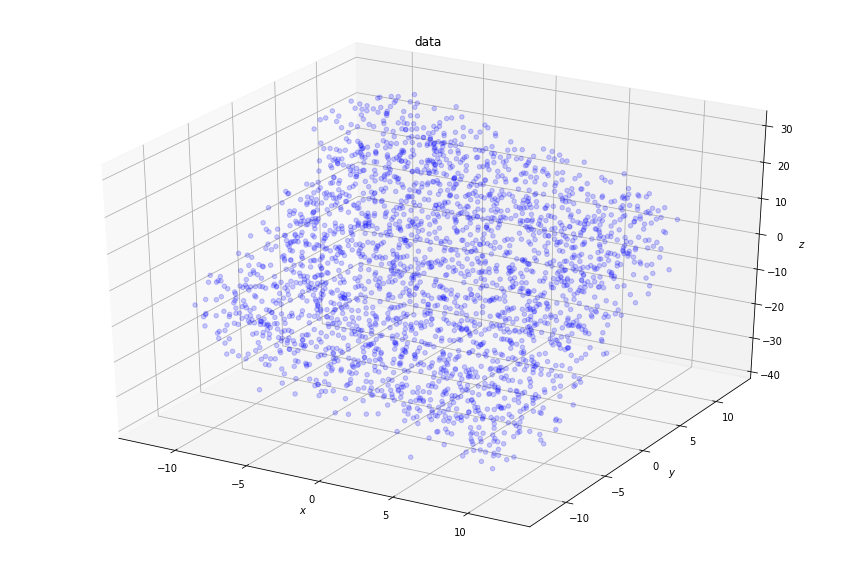

In [3]:
# x, y, z의 좌표를 coordinate한 것.

fig = plt.figure(figsize=(12, 8))

ax1 = plt.subplot(111, projection='3d')
plt.title('data')

ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_zlabel('$z$')

ax1.scatter(xx, yy, zz, marker='o', color='blue', alpha=0.2)

plt.tight_layout()
plt.show()

## compute the loss function

In [9]:
theta = np.array((0, 2, 0))
print(theta)
theta[1]

In [41]:
def model_function(theta, x, y):
    f_hat = theta[0] + theta[1] * x + theta[2] * y
    return f_hat

In [61]:
print(xx)
print(yy)
print(2 * xx + 1 * yy)
a = np.array((0, 2, 1))
f_hat = model_function(a, xx, yy)
print(f_hat)

[ -8.93733729  -8.06071484 -10.26082727 ...   8.87431539   8.67785323
   9.82222519]
[-10.73164681 -10.78788051 -10.09725504 ...  10.16745925  11.09105394
   9.52188547]
[-28.60632138 -26.90931019 -30.61890958 ...  27.91609004  28.4467604
  29.16633586]
[-28.60632138 -26.90931019 -30.61890958 ...  27.91609004  28.4467604
  29.16633586]


In [84]:
b = np.array([1, 2, 3], ndmin = 2)
b = xx.reshape(1, num_data)
print(b.T)
print(b.T.shape)

[[ -8.93733729]
 [ -8.06071484]
 [-10.26082727]
 ...
 [  8.87431539]
 [  8.67785323]
 [  9.82222519]]
(2500, 1)


In [45]:
def compute_residual(theta, x, y, z):
    # ===== FILL UP THE CODE =====
    f_hat = model_function(theta, x, y)
    residual = z - f_hat
    num_data = residual.shape[0]
    # ============================
    return residual, num_data

In [48]:
residual, num_data = compute_residual(a, xx, yy, zz)
print(residual)
print(num_data)

[ 14.3799173   20.19913349  17.9480128  ... -14.6605075  -20.51986776
 -19.15817502]
2500


In [56]:
b = np.array((1, 2, 3))
print(b ** 2)
np.sum(b, axis = None)

In [81]:
k = np.array([residual, residual, residual])
k.shape

In [90]:
xTranspose = xx.reshape(1, 2500).T
yTranspose = yy.reshape(1, 2500).T
zTranspose = zz.reshape(1, 2500).T
print(xTranspose)
print(yTranspose)
print(zTranspose)

[[ -8.93733729]
 [ -8.06071484]
 [-10.26082727]
 ...
 [  8.87431539]
 [  8.67785323]
 [  9.82222519]]
[[-10.73164681]
 [-10.78788051]
 [-10.09725504]
 ...
 [ 10.16745925]
 [ 11.09105394]
 [  9.52188547]]
[[-14.22640408]
 [ -6.7101767 ]
 [-12.67089679]
 ...
 [ 13.25558254]
 [  7.92689264]
 [ 10.00816084]]


In [101]:
k2 = np.hstack((xTranspose, yTranspose, zTranspose))
# k2 = np.hstack((k2, zTranspose))
print(k2)
print(k2.shape)

[[ -8.93733729 -10.73164681 -14.22640408]
 [ -8.06071484 -10.78788051  -6.7101767 ]
 [-10.26082727 -10.09725504 -12.67089679]
 ...
 [  8.87431539  10.16745925  13.25558254]
 [  8.67785323  11.09105394   7.92689264]
 [  9.82222519   9.52188547  10.00816084]]
(2500, 3)


In [102]:
k3 = np.matmul(residual, k2)
print(k3)
print(k3.shape)

[-265839.46521904   83221.09579366  474459.53648119]
(3,)


In [98]:
one = np.ones(shape = (num_data, 1), dtype = int)
print(one)

[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


In [57]:
def compute_loss(theta, x, y, z):
    # ===== FILL UP THE CODE =====
    residual, num_data = compute_residual(theta, x, y, z)
    squared_residual = residual ** 2
    sum_residual = np.sum(squared_residual, axis = None)
    loss = sum_residual / (2 * num_data)
    # ============================
    return loss

In [60]:
test_loss = compute_loss(a, xx, yy, zz)
test_loss

184.5834742251225

## compute the gradient for each model parameter (DO NOT COMPUTE THE GRADIENT FOR EACH MODEL PARAMETER, BUT DO COMPUTE THE GRADIENT OF THE MODEL PARAMTER VECTOR)

In [ ]:
# 이전까지는 각각 구했음 -> 이번에는 vector로 구성을 해야함. 
# 각각 구하고 vector로 구하면 안되고, 한번에 구해질 수 있도록 해야함. 
# -> matrix와 vector의 연산을 통해서 구하도록 하자.
def compute_gradient(theta, x, y, z):
    # ===== FILL UP THE CODE =====
    residual, num_data = compute_residual(theta, x, y, z)
    x_transpose = x.reshape(1, num_data).T
    y_transpose = y.reshape(1, num_data).T
    one_array = np.ones(shape = (num_data, 1), dtype = int)
    
    matrix_mul = np.hstack((one_array, x_transpose, y_transpose))
    
    grad = np.matmul(residual, matrix_mul)
    
    # ============================
    return grad

## gradient descent for each model parameter

In [ ]:
num_iteration   = 1000
learning_rate   = 0.01

theta           = np.array((0, 0, 0))
theta_iteration = np.zeros((num_iteration, theta.size))
loss_iteration  = np.zeros(num_iteration)

for i in range(num_iteration):
    # ===== FILL UP THE CODE =====
    theta = theta - learning_rate * f

    # ============================
    print("iteration = %4d, loss = %5.5f" % (i, loss))

In [ ]:
f = theta[0] + theta[1] * xx + theta[2] * yy

## plot the results

In [ ]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))
    plt.title('loss')
    # ===== FILL UP THE CODE =====


    # ============================
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_data(xx, yy, zz):
    
    fig = plt.figure(figsize=(12, 8))
    ax  = plt.subplot(111, projection='3d')
    plt.title('data')
    # ===== FILL UP THE CODE =====


    # ============================    
    plt.tight_layout()
    plt.show()

In [ ]:

def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')
    # ===== FILL UP THE CODE =====


    # ============================
    plt.tight_layout()
    plt.show()

In [ ]:
plot_loss_curve(loss_iteration)

In [ ]:
plot_model_parameter(theta_iteration)

In [ ]:
    # ===== FILL UP THE CODE =====


    # ============================

def plot_surface(XX, YY, ZZ, xx, yy, zz):

    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111, projection='3d')
    plt.title('regression surface')

    ax  = plt.axes(projection='3d')
    # ===== FILL UP THE CODE =====


    # ============================
    plt.tight_layout()
    plt.show()

In [ ]:
plot_surface(XX, YY, ZZ, xx, yy, zz)

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data in blue point in 3-dimensional space

In [ ]:
plot_data(xx, yy, zz)

### # 02. plot the values of the model parameters $\theta_0$ in red curve, $\theta_1$ in green curve, and $\theta_2$ in blue curve over the gradient descent iterations

In [ ]:
plot_model_parameter(theta_iteration)

### # 03. plot the loss values $\mathcal{L}(\theta)$ in red curve over the gradient descent iterations

In [ ]:
plot_loss_curve(loss_iteration)

### # 04. plot the optimal regression surface $\hat{f}(\theta^*)$ in 3-dimensional space with a given set of data points superimposed

In [ ]:
plot_surface(XX, YY, ZZ, xx, yy, zz)